In [17]:
import numpy as np
import sympy
import random
import math
import matplotlib.pyplot as plt
from sympy import *
import scipy
np.random.seed(6)

theta_min = -5
theta_max = 5
grid_num = 101
thetagrid = np.linspace(theta_min, theta_max, grid_num)
alpha = 0.1

y_u = np.linspace(theta_min, theta_max, grid_num)
y_l = np.linspace(theta_min, theta_max, grid_num)

# x1 = np.random.normal(0)
# print(x1)
x1 = 0.5

for i in range(len(thetagrid)):
    y_u[i] = np.dot(2,thetagrid[i]) + sqrt(2)*scipy.stats.norm.ppf( 1-alpha/2,0,1)
    y_l[i] = np.dot(2,thetagrid[i]) + sqrt(2)*scipy.stats.norm.ppf( alpha/2,0,1)

In [18]:
y_u1 = np.linspace(theta_min, theta_max, grid_num)
y_l1 = np.linspace(theta_min, theta_max, grid_num)

for i in range(len(thetagrid)):
    y_u1[i] = np.dot(1,thetagrid[i]) + scipy.stats.norm.ppf(1-alpha/2,0,1) + x1
    y_l1[i] = np.dot(1,thetagrid[i]) + scipy.stats.norm.ppf(alpha/2,0,1) + x1

In [19]:
theta_l = x1 - scipy.stats.norm.ppf( 1-alpha/4,0,1)
theta_u = x1 - scipy.stats.norm.ppf(alpha/4,0,1)
y_pred_l = float(2* x1 - sqrt(2)* scipy.stats.norm.ppf(1-alpha/4,0,1))
y_pred_u = float(2*x1 - sqrt(2)*scipy.stats.norm.ppf(alpha/4,0,1))
print(theta_l,theta_u)
print(y_pred_l,y_pred_u)

-1.459963984540054 2.4599639845400545
-1.7718076486993557 3.7718076486993564


In [20]:
y_u_plus = np.linspace(theta_l, theta_u, grid_num)
y_l_plus = np.linspace(theta_l, theta_u, grid_num)
thetagrid1= np.linspace(theta_l, theta_u, grid_num)
for i in range(len(thetagrid1)):
    y_u_plus[i] = np.dot(1,thetagrid1[i]) + scipy.stats.norm.ppf(1-alpha/4,0,1) + x1
    y_l_plus[i] = np.dot(1,thetagrid1[i]) + scipy.stats.norm.ppf(alpha/4,0,1) + x1

In [21]:
y_u_plus1 = np.linspace(theta_l, theta_u, grid_num)
y_l_plus1 = np.linspace(theta_l, theta_u, grid_num)
thetagrid1= np.linspace(theta_l, theta_u, grid_num)
for i in range(len(thetagrid1)):
    y_u_plus1[i] = np.dot(2,thetagrid1[i]) + sqrt(2)*scipy.stats.norm.ppf( 1-alpha/4,0,1)
    y_l_plus1[i] = np.dot(2,thetagrid1[i]) - sqrt(2)*scipy.stats.norm.ppf( 1-alpha/4,0,1)

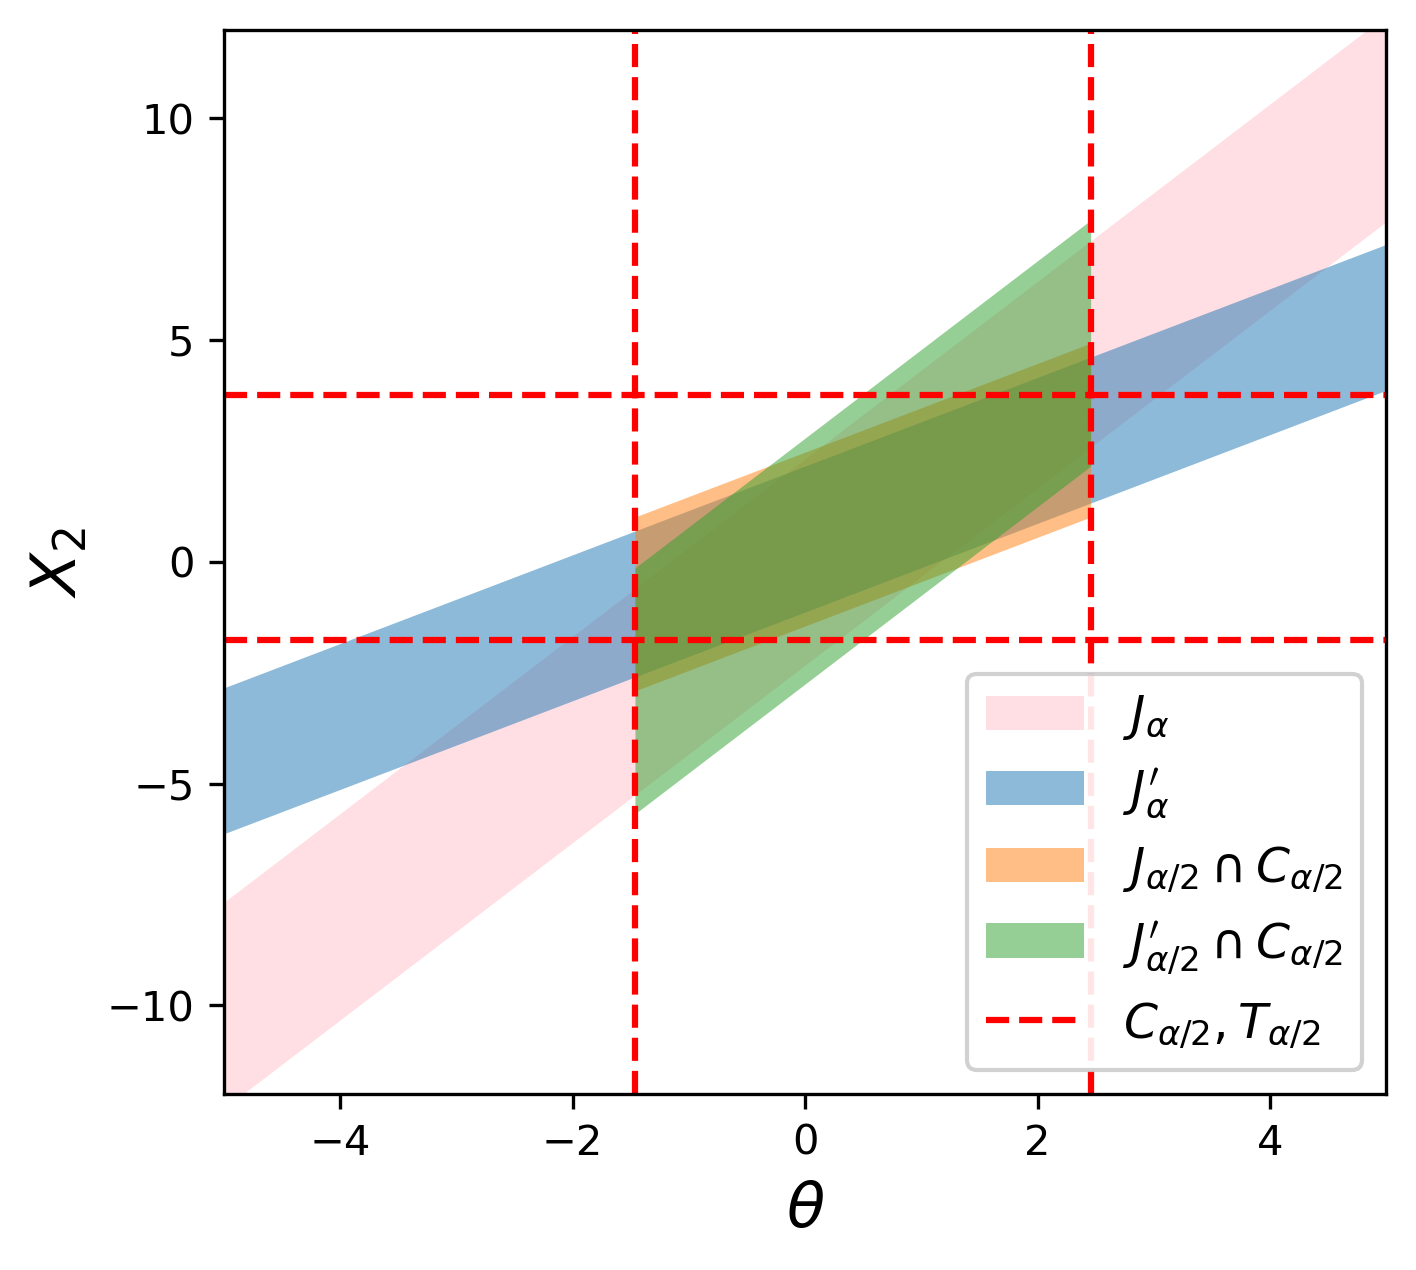

In [22]:
fig, ax = plt.subplots(dpi=300,figsize=(5,4.7))

ax.fill_between(thetagrid, y_l, y_u, alpha=.5, linewidth=0,color='pink',label='$J_{α}$')
ax.fill_between(thetagrid, y_l1, y_u1, alpha=.5, linewidth=0,label='$J_{α}\'$')
ax.fill_between(thetagrid1, y_l_plus, y_u_plus, alpha=.5, linewidth=0,label='$J_{α/2} \cap C_{α/2}$')
ax.fill_between(thetagrid1, y_l_plus1, y_u_plus1, alpha=.5, linewidth=0,label='$J_{α/2}\' \cap C_{α/2}$')

vline_indx = [theta_l, theta_u]
hline_indx = [y_pred_l, y_pred_u]

ymin = -12
ymax = 12
 
plt.vlines(vline_indx, ymin, ymax, colors='r', linestyles='dashed',label='$C_{α/2},T_{α/2}$')
plt.hlines(hline_indx, -5,5, colors='r', linestyles='dashed')


plt.ylabel('$X_2$',size=15)
plt.xlabel('$θ$',size=15)
plt.xlim(-5,5)
plt.ylim(ymin,ymax)
plt.legend(loc='lower right',fontsize=11.7,framealpha=0.9)
plt.savefig('multiple_inference.png',bbox_inches = 'tight')
plt.show()

In [59]:
theta0 = 0 
idx1 = 0
idx2 = 0
idx3 = 0
repeat = 10000
for trial in range(repeat):
    x1 = np.random.normal(0) + theta0
    x2 = np.random.normal(0) + theta0 + x1
    theta_l = x1 - scipy.stats.norm.ppf( 1-alpha/4,0,1)
    theta_u = x1 - scipy.stats.norm.ppf( alpha/4,0,1)
    y_pred_l = float(2* x1 - sqrt(2)* scipy.stats.norm.ppf( 1-alpha/4,0,1))
    y_pred_u = float(2*x1 - sqrt(2)*scipy.stats.norm.ppf( alpha/4,0,1))
    if (theta_l <theta0)&(theta0<theta_u)&(x2>y_pred_l)&(x2<y_pred_u):
        idx1 += 1
    if (x2 - x1 -  theta0 <  scipy.stats.norm.ppf(1-alpha/2,0,1))&(x2 - x1 -  theta0 >  scipy.stats.norm.ppf( alpha/2,0,1)):
        idx2 += 1
    if (x2 - x1 -  theta0 <  scipy.stats.norm.ppf(1-alpha/4,0,1))&(x2 - x1 -  theta0 >  scipy.stats.norm.ppf( alpha/4,0,1))&(theta_l <theta0)&(theta0<theta_u):
        idx3 += 1
    if trial%500==0:
        print(trial)
print(idx1/repeat,idx2/repeat,idx3/repeat)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
0.9193 0.8991 0.9023
